<a href="https://colab.research.google.com/github/tagtag/TDPCAbasedFE/blob/main/Sec_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table 4.51の結果を出すためのNotebook です

In [1]:
N<-100;N1<-10;N2<-10
M<-20
s <- 4
pca01<-NULL
pca02<-NULL
pca03<-NULL
pca_all <- NULL
pp1<-NULL
ppp1 <- NULL
for (i in c(1:100))
{
    cat(i, " ")
    x <- matrix(NA,N,M)
    x[1:N1,1:(M/2)] <- rnorm(N1*(M/2))
    x[1:N1,(M/2+1):M] <- rnorm(N1*(M/2),2*s)
    x[(N1+1):(N1+N2),1:(M/4)] <- rnorm(N2*(M/4),0)
    x[(N1+1):(N1+N2),(M/4+1):(M/2)] <- rnorm(N2*(M/4),s)
    x[(N1+1):(N1+N2),(M/2+1):(M*3/4)] <- rnorm(N2*(M/4),2*s)
    x[(N1+1):(N1+N2),(3*M/4+1):M] <- rnorm(N2*(M/4),3*s)
    x[(N1+N2+1):N,] <- rnorm((N-N1-N2)*M,s)
    pca <- prcomp(x)
    pca01 <-c(pca01,sum(order(-pca$x[,1]^2)[1:10] %in% 11:20))
    pca02 <- c(pca02,sum(order(-pca$x[,1]^2)[11:20] %in% 1:10))
    LM <- lm(t(x)~factor(rep(1:4,each=5)))
    SLM <- summary(LM)
    sum(order(-unlist(lapply(SLM,"[",8)))[1:20] %in% 1:20)
    LM1 <- lm(t(x)~factor(rep(1:2,each=10)))
    SLM1 <- summary(LM1)
    pp1 <- c(pp1,sum(order(-unlist(lapply(SLM1,"[",8)))[1:10] %in% 1:10))
    ppp1 <-c(ppp1,sum(setdiff(order(-unlist(lapply(SLM,"[",8)))[1:20],order(-unlist(lapply(SLM1,"[",8)))[1:10] ) %in% 11:20))
}
mean(pca01)
mean(pca02)
mean(pp1)
mean(ppp1)

1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  

[1] 10

[1] 10

[1] 9.99

[1] 9.99

結果を表示します

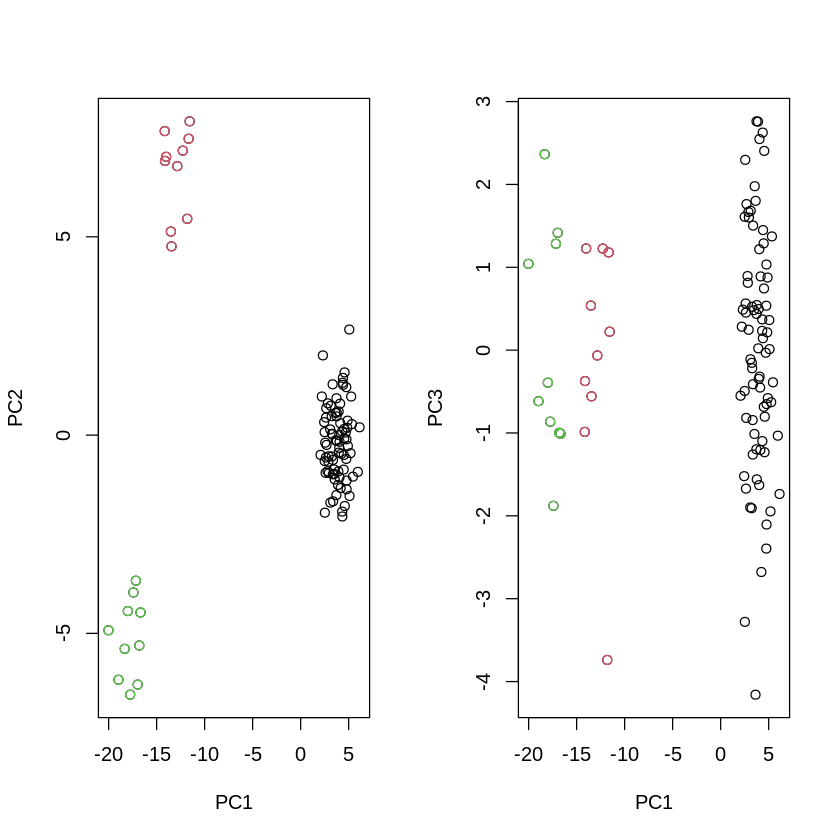

In [2]:
par(mfrow=c(1,2))
plot(pca$x);points(pca$x[1:10,],col=2);points(pca$x[11:20,],col=3);
plot(pca$x[,c(1,3)]);points(pca$x[1:10,c(1,3)],col=2);points(pca$x[11:20,c(1,3)],col=3);
par(mfrow=c(1,1))

Fig4.2を出します

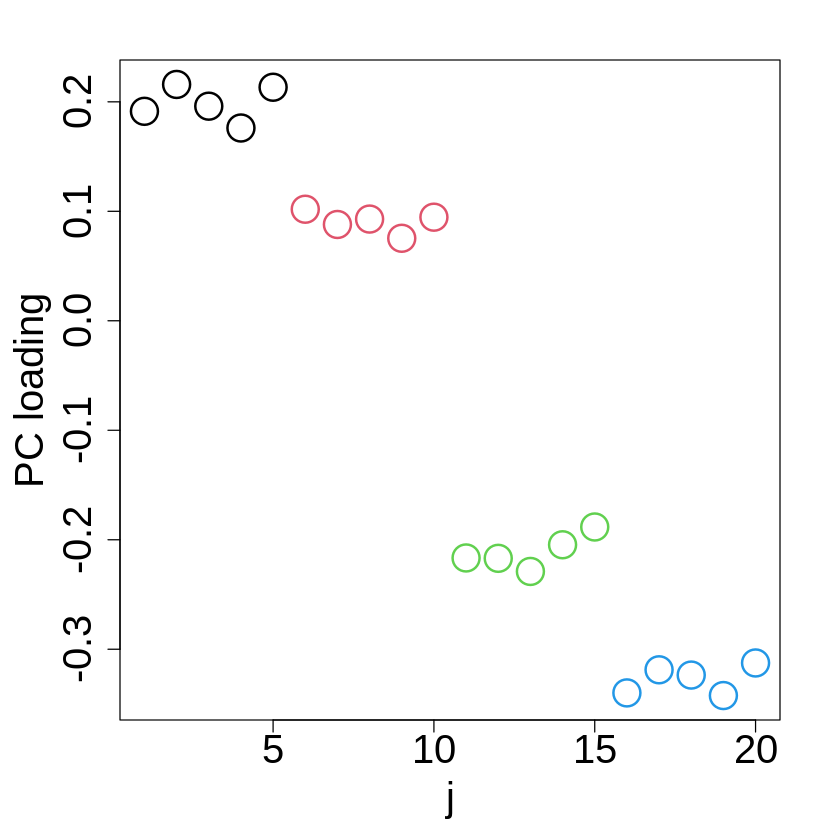

In [3]:
par(mai=c(1,1,0.5,0.5))
plot(pca$rotation[,1],col=rep(1:4,each=5),cex=3,lwd=2,ylab="PC loading",cex.axis=2,cex.lab=2,xlab="j")